# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [4]:
import pandas as pd
x_train = pd.read_csv("x_train_balanced.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')
x_test = pd.read_csv("x_test.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')


In [5]:
x_test

,Age,Income,Number of Children,Gender_encoded,MaritalStatus_encoded,HomeOwnership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,5500000.0,0,0,1,1,1,0,0,0
1,48.0,8750000.0,1,0,0,0,0,1,0,0
2,26.0,5500000.0,1,0,0,0,1,0,0,0
3,39.0,6250000.0,2,0,0,0,1,0,0,0
4,35.0,9000000.0,1,0,0,0,0,1,0,0
5,25.0,5500000.0,0,0,1,1,1,0,0,0
6,48.0,8250000.0,1,0,0,0,0,1,0,0
7,48.0,8250000.0,1,0,0,0,0,1,0,0
8,36.0,9500000.0,2,0,0,0,0,0,0,1
9,36.0,9500000.0,1,0,0,0,0,0,1,0


In [6]:
x_train

,Age,Income,Number of Children,Gender_encoded,MaritalStatus_encoded,HomeOwnership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,4.500000e+06,0,0,1,1,0,0,0,0
1,29.000000,2.750000e+06,0,0,1,1,0,0,1,0
2,25.000000,6.250000e+06,0,0,1,1,1,0,0,0
3,29.000000,6.800000e+06,2,0,0,0,0,1,0,0
4,31.000000,6.500000e+06,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
247,27.139269,3.680365e+06,0,0,1,1,0,0,0,0
248,27.000000,3.750000e+06,0,0,1,1,0,0,1,0
249,28.510747,2.994626e+06,0,0,1,1,0,0,0,0
250,27.417411,3.541294e+06,0,0,1,1,0,0,0,0


In [7]:
y_test

,Credit Score_encoded
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [8]:
y_train

,Credit Score_encoded
0,0
1,2
2,0
3,0
4,0
...,...
247,2
248,2
249,2
250,2


In [9]:
# Verificar se as bases estão balanceadas em y_test
test_balance = y_test.value_counts()
print("Balanceamento em y_test:")
print(test_balance)

Balanceamento em y_test:
Credit Score_encoded
1                       29
0                        6
2                        6
Name: count, dtype: int64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [11]:
# Criar uma instância do classificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()

# Treinar o classificador com os dados de treinamento
naive_bayes.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [15]:
#Fazer previsões para os dados de treino
pred_train = naive_bayes.predict(x_train)

# Calcular a acurácia para os dados de treino
accuracy = accuracy_score(y_train, pred_train)
print("Acurácia para os dados de treino:", accuracy)

Acurácia para os dados de treino: 0.9444444444444444


O modelo apresenta um desempenho muito bom, fazendo previsões corretas acerca de 95% das vezes no conjunto de dados de treinamento.

In [16]:
recall = recall_score(y_train, pred_train, average='macro')
print("Recall para os dados de treino:", recall)

Recall para os dados de treino: 0.9444444444444445


O valor apresentado de recall alto significa que o modelo consegui identificar corretamente aproximadamente 95% dos casos positivos em cada classe.

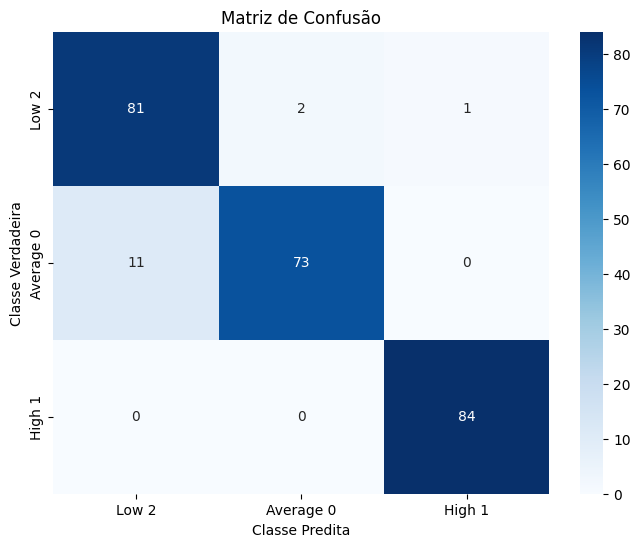

In [21]:
conf_matrix = confusion_matrix(y_train, pred_train)

# Definindo nomes de classes
class_names = ['Low 2', 'Average 0', 'High 1']

# Criando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Com a matrix de confusão, conseguimos extrair algumas informações:


*   A classe Low teve um bom desempenho com poucos erros.
*   A classe Average um desempenho médio com 11 erros.

*   A classe High teve um desempenho perfeito.

No geral, o nosso modelo teve um desempenho muito bom com todas as métricas que adquirimos com a acurária e o recall altos. No entanto plotando a matrix de confusão, a classe average teve 11 amostras com erros, mostrando uma dificuldade em distinguir as classes average e low.






# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [22]:
# Fazer previsões para os dados teste
pred_test = naive_bayes.predict(x_test)

accuracy = accuracy_score(y_test, pred_test)
recall = recall_score(y_test, pred_test, average='macro')
print("Acurácia para os dados de teste:", accuracy)
print("Recall para os dados de teste:", recall)

Acurácia para os dados de teste: 0.926829268292683
Recall para os dados de teste: 0.9655172413793104


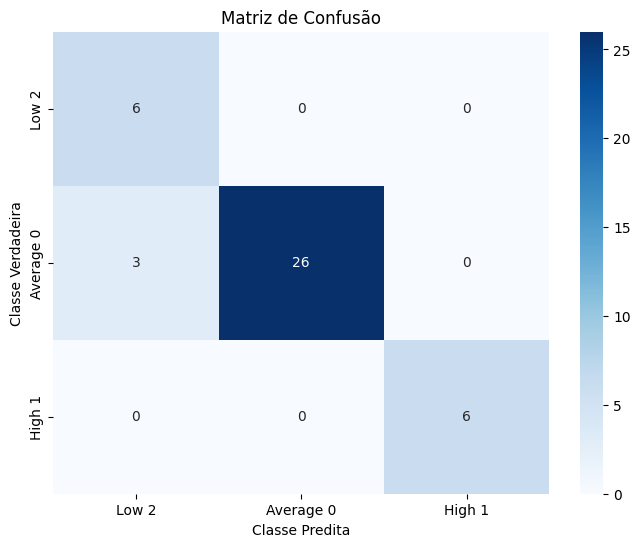

In [23]:
conf_matrix_test = confusion_matrix(y_test, pred_test)

# Definindo o nome das classes
class_names = ['Low 2', 'Average 0', 'High 1']

# Criando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Com a matrix de confusão dos dados de teste conseguimos as seguintes informações:



*   A classe Low teve um desempenho perfeito.
*   A classe Average teve um desempenho médio, com 3 erros.
*   A classe High també com um desempenho perfeito

Obtemos uma acurácia menor de 92% e um recall maior, de 96% em relação ao recall dos dados de treino. Essas informações mostram que o modelo tem uma resposta relativamente alta para os dados aos quais foram aplicados.






# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

O projeto consiste em desenvolver um modelo que seja capaz de prever a classificação do score de crédito de clientes usando suas características finaceiras. Usamos o algoritímo Naive Bayes que é útil em problemas de classificação.
O uso do algorítmo é aplicado na construção do modelo para ser capaz de classificar os clientes com base nas classes de crédito e calcular a probabilidade de risco financeiro. Sendo assim conceder o limite de crédito, resguardando a instituição financeira.
Contudo, nosso modelo apresentou um bom desempenho com métricas entre 95% de assertividade nas previsões, sendo confiável no auxilio da instituição finaceira na concessão de crédito.